<a href="https://colab.research.google.com/github/agarwalsahil2013/Stock-Price-Prediction/blob/main/News_Headlines_Stocks_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of news headlines for WMT and TSLA 

In [1]:
# Importing libraries
import io
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
# Upload "headline_tsla" & "headline_wmt" file from your local drive
uploaded = files.upload()

Saving headline_wmt.csv to headline_wmt.csv
Saving headline_tsla.csv to headline_tsla.csv


In [5]:
# Reading uploaded files into python
wmt_headlines = pd.read_csv(io.BytesIO(uploaded['headline_wmt.csv']))
tsla_headlines = pd.read_csv(io.BytesIO(uploaded['headline_tsla.csv']))

# Function to generate compound analysis and sentiment analysis

In [6]:
# Function to generate graphs using Vader method
def sentiment_analyzer(df, ticker, days):
    df2=df[["Dates","Headlines"]]

    vader = SentimentIntensityAnalyzer()
    scores = df2['Headlines'].apply(vader.polarity_scores).tolist()
    scores_df = pd.DataFrame(scores)
    parsed_and_scored_news = df2.join(scores_df, rsuffix='_right')
    parsed_and_scored_news['Dates'] = pd.to_datetime(parsed_and_scored_news.Dates).dt.date

    # Last number of days of news headlines analysis with compound
    plt.rcParams['figure.figsize'] = [25, 8]
    mean_scores = parsed_and_scored_news.groupby(['Dates']).mean()
    mean_scores = mean_scores.unstack()
    mean_scores = mean_scores.xs('compound').transpose()
    mean_scores.tail(days).plot(kind = 'bar')
    plt.title(f"'Compound' analysis for {ticker} in the last {days} days")

    # Last number of days of new headlines analysis with pos, neu and neg
    TITLE = f"Negative, neutral, and positive sentiment for {ticker} in the last {days} days"
    COLORS = ["red","orange", "green"]
    mean_scores1 = parsed_and_scored_news.groupby(['Dates']).mean()
    plot_day = mean_scores1.drop("compound",axis=1)

    return plt.grid(), plot_day.tail(days).plot.bar(stacked = True, figsize=(25, 8), title = TITLE, 
                      color = COLORS).legend(bbox_to_anchor=(0.9, 0.5))

(None, <matplotlib.legend.Legend at 0x7fa9169d4f60>)

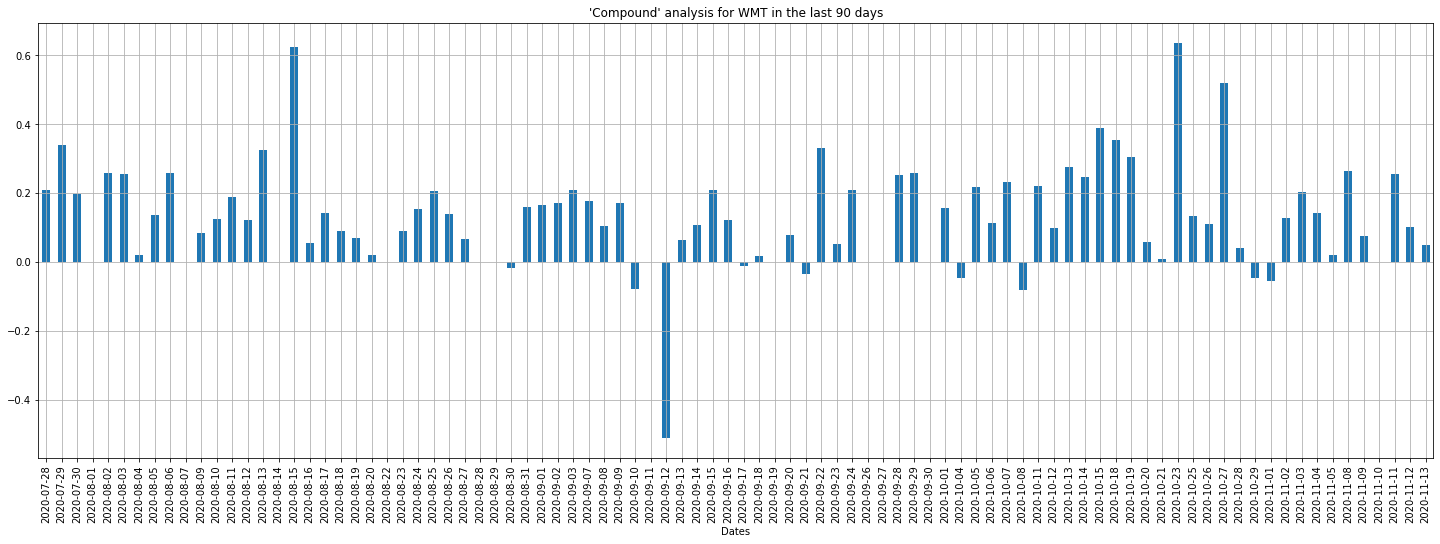

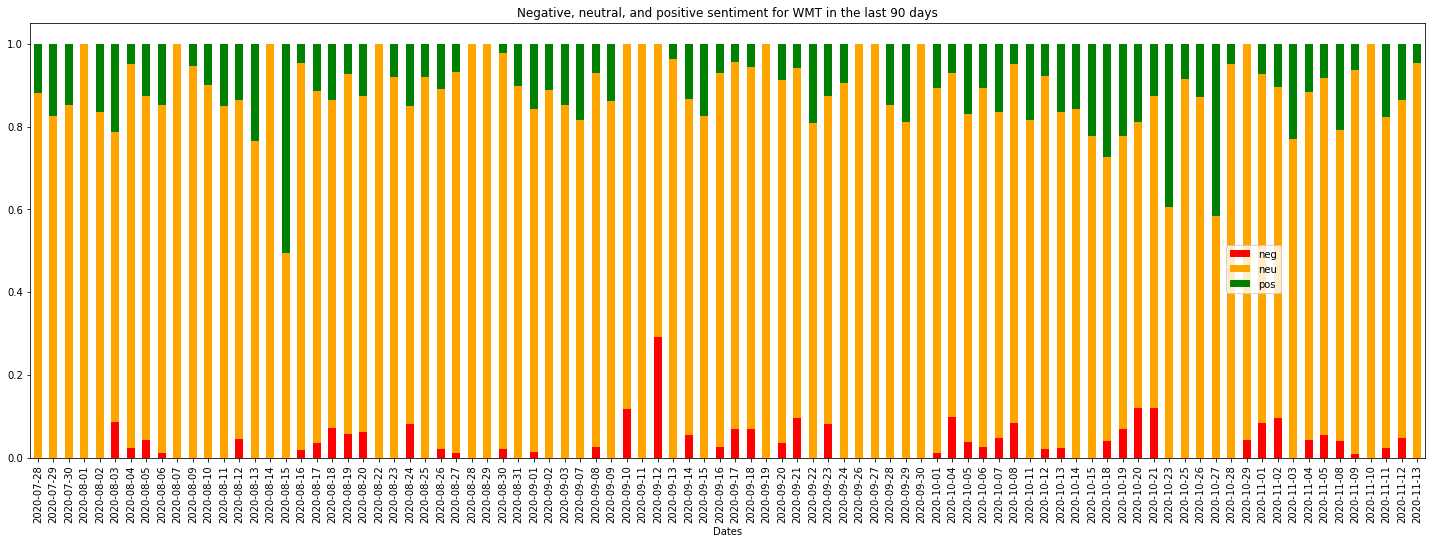

In [7]:
# Creating WMT graphs of "compound" and "pos,neg,neu"
sentiment_analyzer(df=wmt_headlines,ticker="WMT",days=90)

(None, <matplotlib.legend.Legend at 0x7fa916cfee48>)

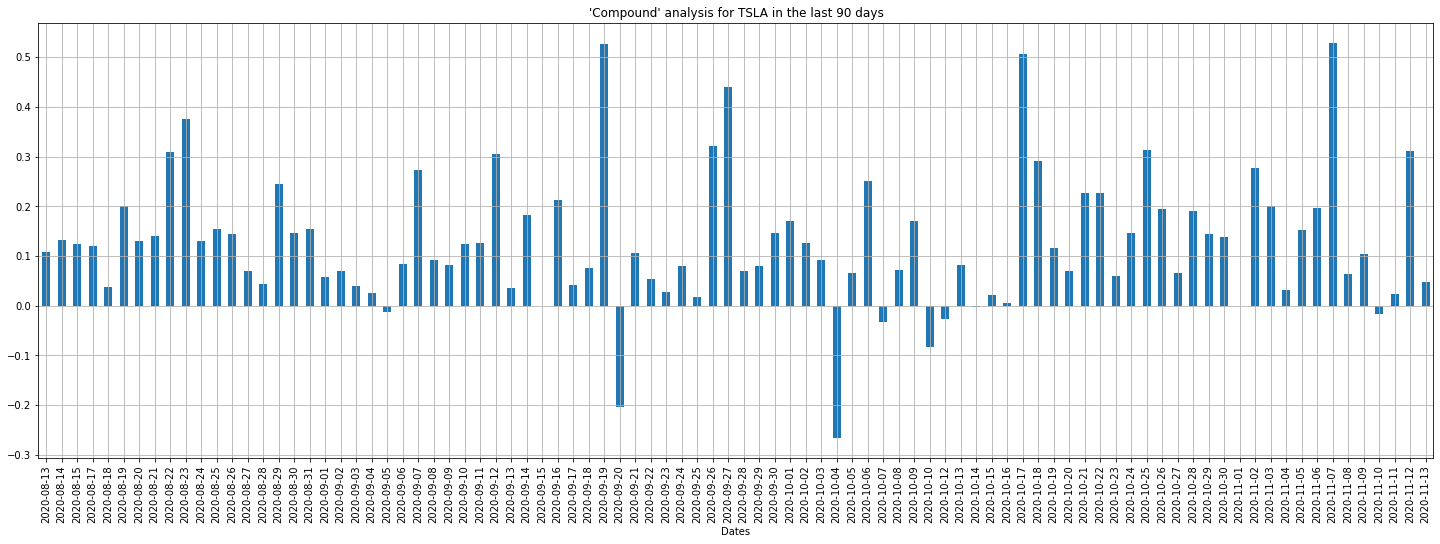

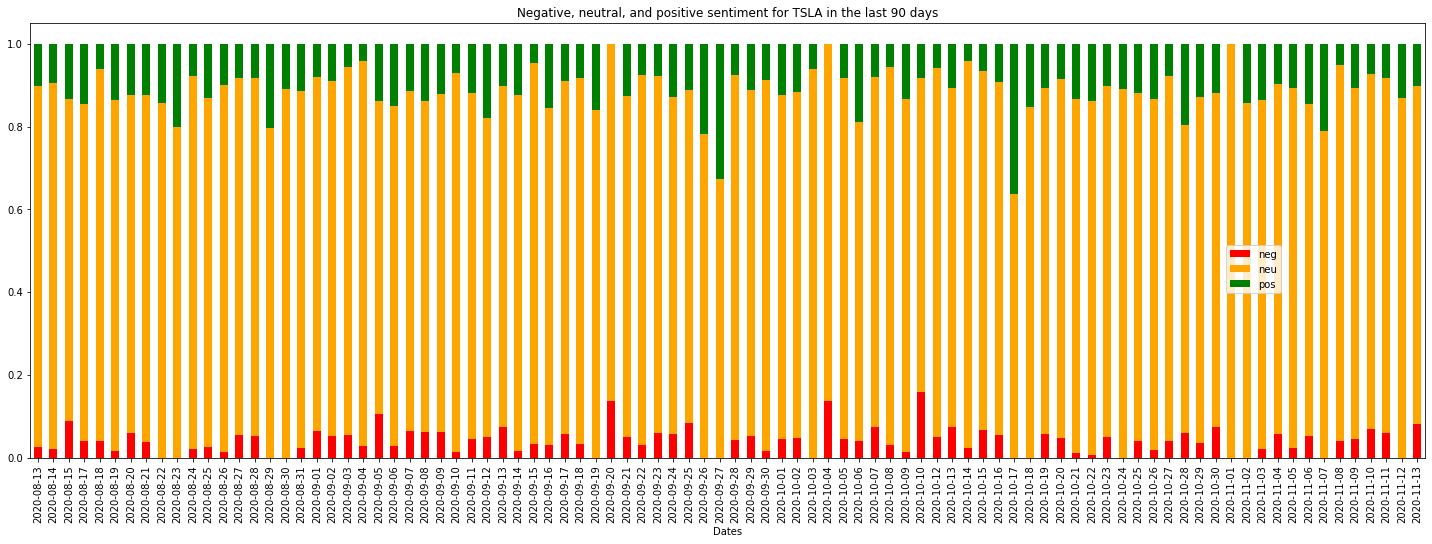

In [8]:
# Creating TSLA graphs of "compound" and "pos,neg,neu"
sentiment_analyzer(df=tsla_headlines,ticker="TSLA",days=90)

# Generating Polarity Score to predict the effect of news on the stocks

In [9]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 7.2MB/s 


In [10]:
# Importing libraries
import io
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from google.colab import files

In [13]:
# Removing unnecessary columns
new = wmt_headlines.drop(columns="Unnamed: 0")
new.head()

,Headlines,Dates
0,Earnings Outlook: Walmart earnings preview: As...,11/13/2020
1,Walmart Earnings: The Trends to Watch,11/13/2020
2,"4 Top Stock Trades for Monday: NIO, WMT, DIS, JD",11/13/2020
3,Seeking Alpha Catalyst Watch,11/13/2020
4,Gap Seeks Reinvention Amid Its Retreat,11/12/2020


In [14]:
# Create a function to get the Subjectivity
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the Polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

In [15]:
# Create two new columns "Subjectvity" and "Polarity"
new["Subjectivity"] = new["Headlines"].apply(getsubjectivity)
new["Polarity"] = new["Headlines"].apply(getpolarity)

In [16]:
# Show the new columns in the new dataset
new.head()

,Headlines,Dates,Subjectivity,Polarity
0,Earnings Outlook: Walmart earnings preview: As...,11/13/2020,0.5,0.5
1,Walmart Earnings: The Trends to Watch,11/13/2020,0.0,0.0
2,"4 Top Stock Trades for Monday: NIO, WMT, DIS, JD",11/13/2020,0.5,0.5
3,Seeking Alpha Catalyst Watch,11/13/2020,0.0,0.0
4,Gap Seeks Reinvention Amid Its Retreat,11/12/2020,0.0,0.0


In [17]:
# Create a function to get the sentiment scores
def getSIA(text):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(text)
  return sentiment

In [18]:
# Get the sentiment scores for each day
compound = []
neg = []
pos = []
neu = []
SIA = 0

for i in range(0, len(new["Headlines"])):
  SIA = getSIA(new["Headlines"][i])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

In [19]:
# Store the sentiment score in the new dataset
new["Compound"] = compound
new["Negative"] = neg
new["Neutral"] = neu
new["Positive"] = pos

In [20]:
# Averaging the score by the date and saving into csv file format
csv_files = new.groupby(["Dates"]).mean()
csv_files.to_csv("PolarityScores_TSLA.csv")

In [21]:
# Show the new dataset created with sentiment scores
csv_files.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Dates,,,,,,
1/1/2014,0.000000,0.000000,0.06800,0.000,0.96420,0.03580
1/1/2018,0.200000,0.112500,-0.01555,0.079,0.85375,0.06725
1/1/2020,0.228535,0.111616,0.34965,0.000,0.77850,0.22150
1/10/2012,0.200000,0.075000,0.13660,0.000,0.84650,0.15350
1/10/2013,0.227273,0.068182,0.00000,0.000,1.00000,0.00000
